# Netflix-Exploratory Data Analysis (EDA) and Visualization Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\mysel\Downloads\netflix_titles_2021 - netflix_titles_2021.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1714,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,110,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## Data Cleaning and Handling Outliers

In [7]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [8]:
# Ensure 'duration' is string and fill missing values
df['duration'] = df['duration'].astype(str).fillna('Unknown')

# Convert seasons to equivalent minutes (assuming 1 season = 400 min)
def convert_duration(x):
    if 'Season' in x:
        try:
            num_seasons = int(x.split()[0])
            return f"{num_seasons * 400} min"
        except (ValueError, IndexError):
            return 'Unknown'
    return x

df['duration'] = df['duration'].apply(convert_duration)

# Extract numeric values using raw string to avoid warnings
df['duration_numeric'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [9]:
# Fill missing values:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration_numeric'] = df['duration_numeric'].fillna(0)

In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

In [11]:
#After fiiling Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8807 non-null   object        
 9   duration          8807 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  duration_numeric  8807 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB

# Visualizing and Finding insights

## Plot histogram for release year

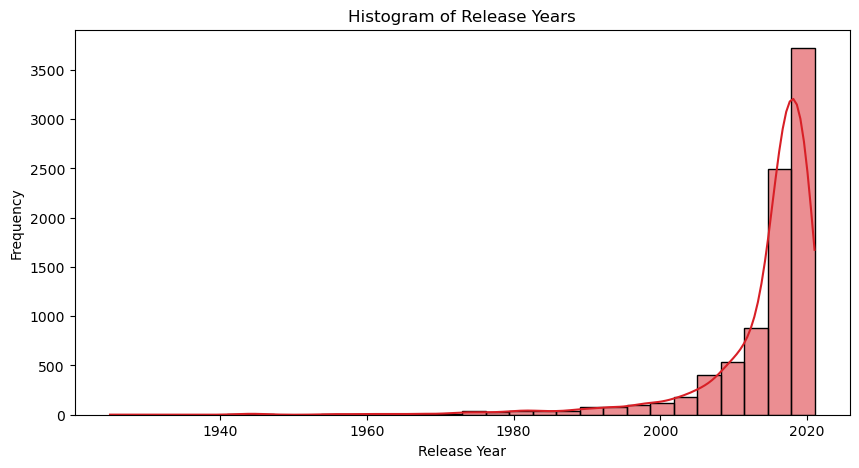

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'], bins=30, kde=True, color='#D81F26')
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

## Visualizing content type using a pie chart

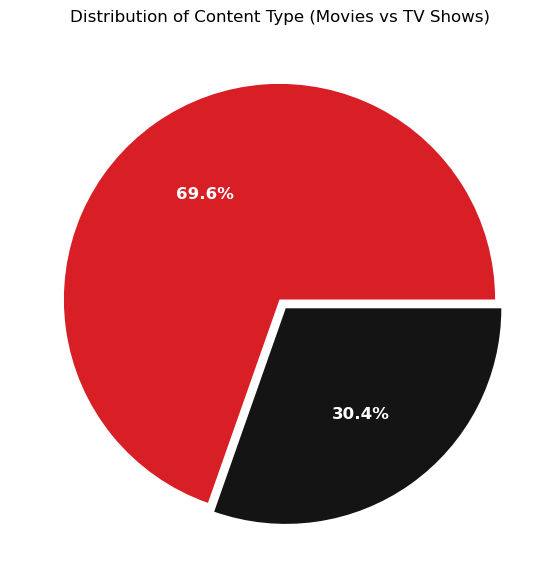

In [13]:
plt.figure(figsize=(7, 7))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#D81F26','#141414'],textprops={'color': 'white','size':12,'fontweight': 'bold'},explode=[0,0.05])
plt.title('Distribution of Content Type (Movies vs TV Shows)')
plt.ylabel('')
plt.show()

## Visualizing Top genres using a bar chart

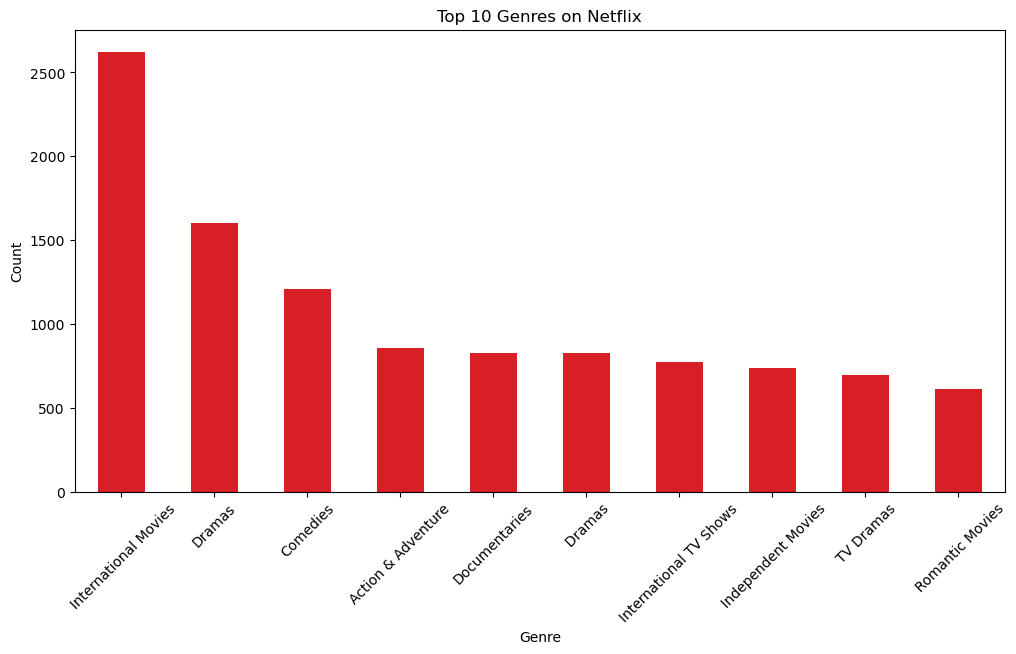

In [14]:
plt.figure(figsize=(12, 6))
df['listed_in'].str.split(',').explode().value_counts().head(10).plot(kind='bar', color='#D81F26')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Here are the insights from the visualizations:
## Content Type:
Movies account for approximately 70% of the content on Netflix, while TV shows make up the remaining 30%.
## Genres: 
The most common genres include Dramas, Comedies, and Documentaries, reflecting Netflix's strong focus on diverse storytelling.

## Boxplot for Movie Duration by Rating

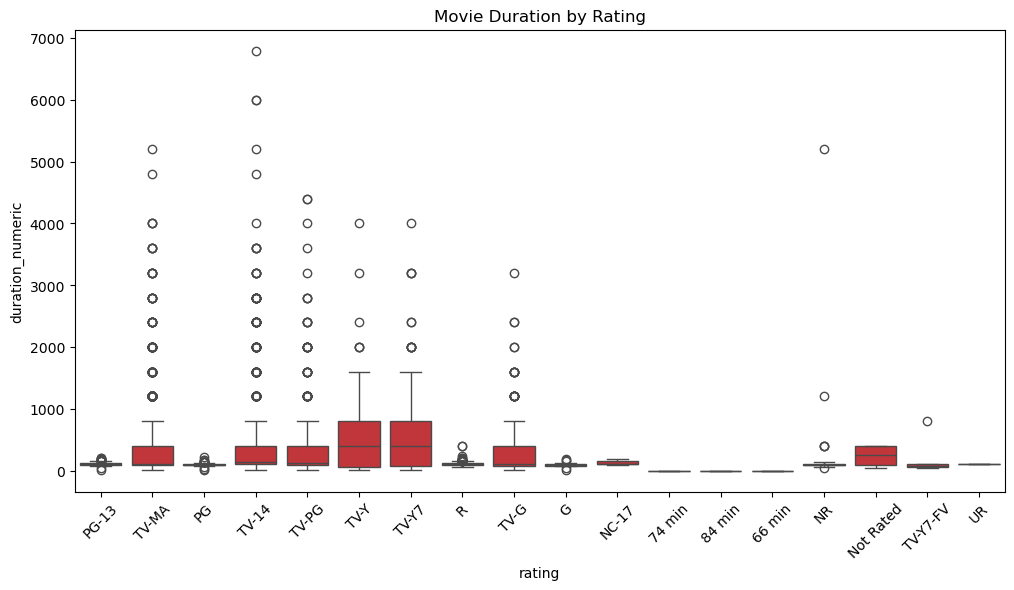

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_numeric', data=df, color='#D81F26')
plt.title('Movie Duration by Rating')
plt.xticks(rotation=45)
plt.show()

## Boxplot for release years by content type

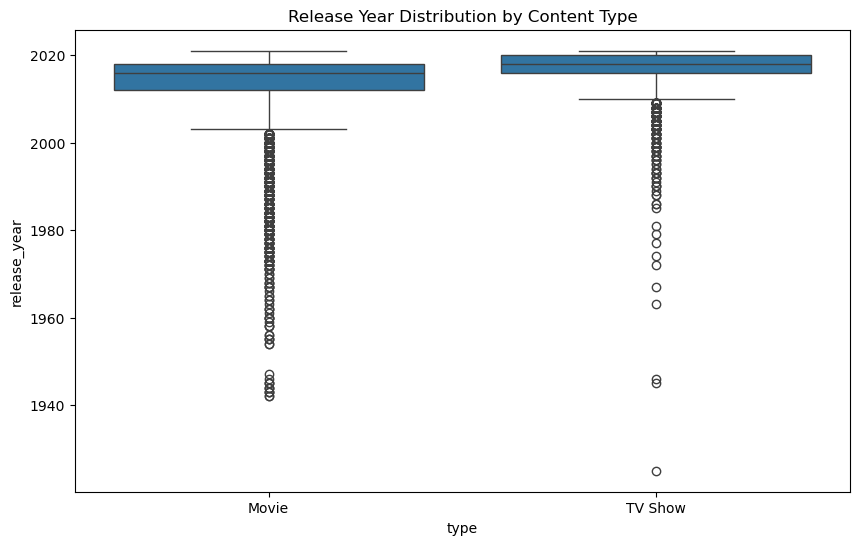

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year Distribution by Content Type')
plt.show()

# The boxplots provide these insights:
## Movie Duration by Rating:
TV-MA and TV-14 movies tend to have longer durations compared to other ratings like PG or R.
Movies with a G rating have shorter durations, typically aligned with children's content.
## Release Year by Content Type:
Both movies and TV shows have seen a significant rise in releases after 2015.
However, TV shows display a slightly wider range, with older releases still available on the platform.

## Scatter plot to explore relationship between release year and movie duration

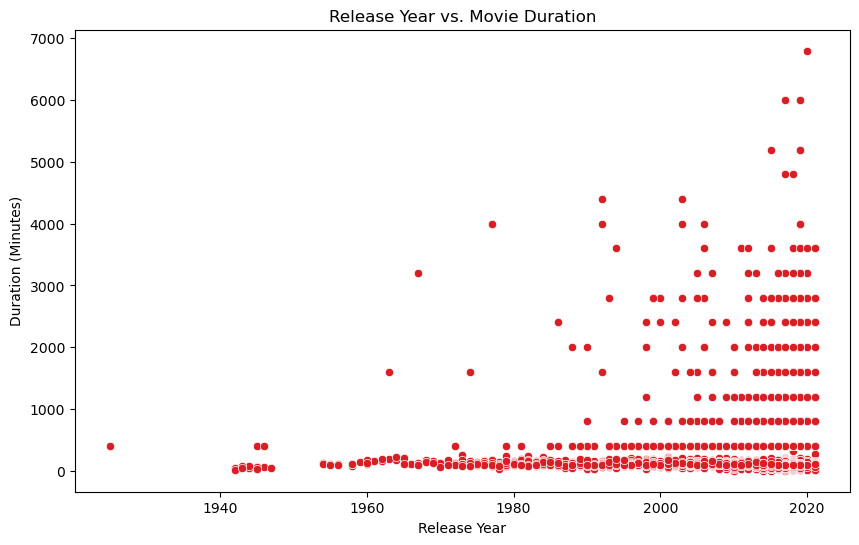

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_numeric', data=df, color='#D81F26', alpha=1)
plt.title('Release Year vs. Movie Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()

# The analysis of relationships reveals:
## Release Year vs. Movie Duration:
Most Movies/Series duration under 1000 min. Movies generally remain within the 60 to 120-minute range, irrespective of release year and most movies released in range between 2000 to 2020.

## Analyzing the Growth of Movies and TV Shows Over the Years

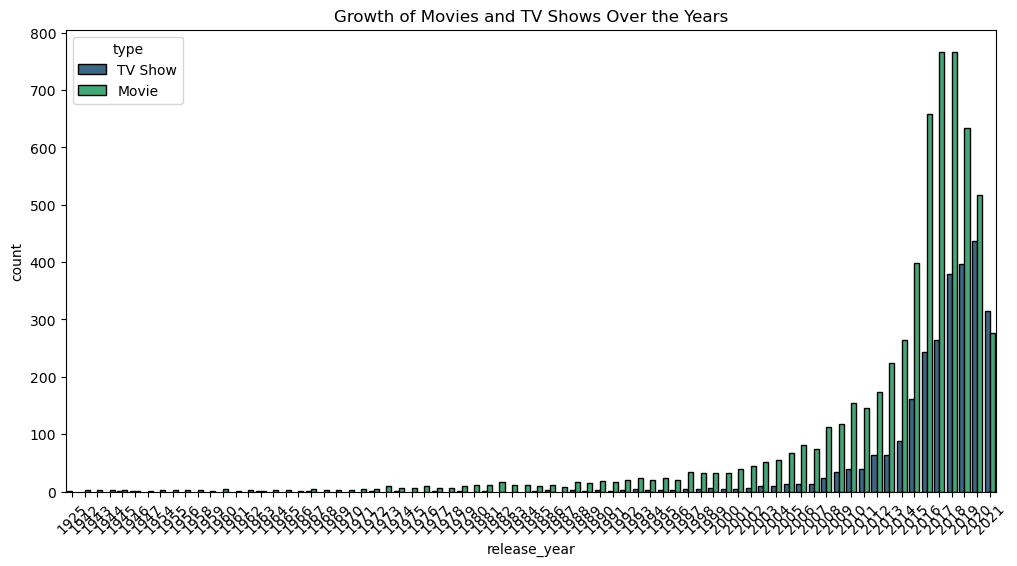

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', hue='type', data=df, palette='viridis', edgecolor='black')
plt.title('Growth of Movies and TV Shows Over the Years')
plt.xticks(rotation=45)
plt.show()

## Distribution of Genres (Movies vs TV Shows)

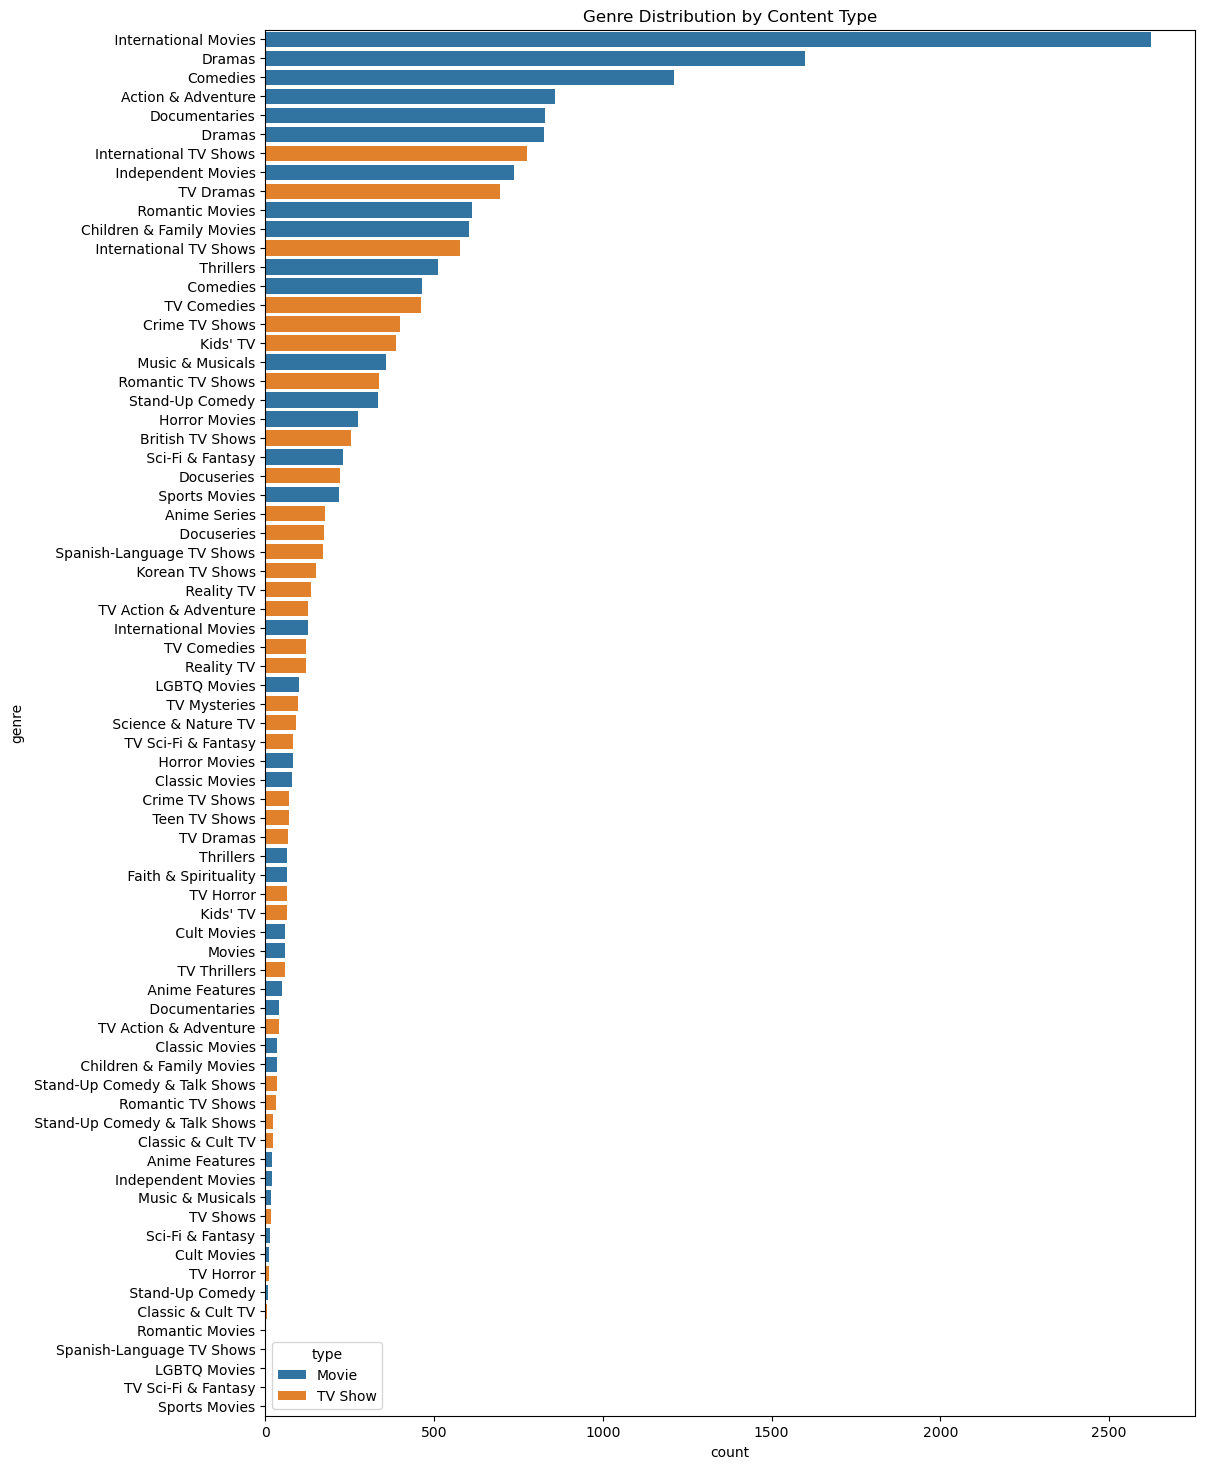

In [19]:
df_exploded = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
plt.figure(figsize=(12, 18))
sns.countplot(y='genre', hue='type', data=df_exploded, order=df_exploded['genre'].value_counts().index)
plt.title('Genre Distribution by Content Type')
plt.show()

## Distribution of Content by Country

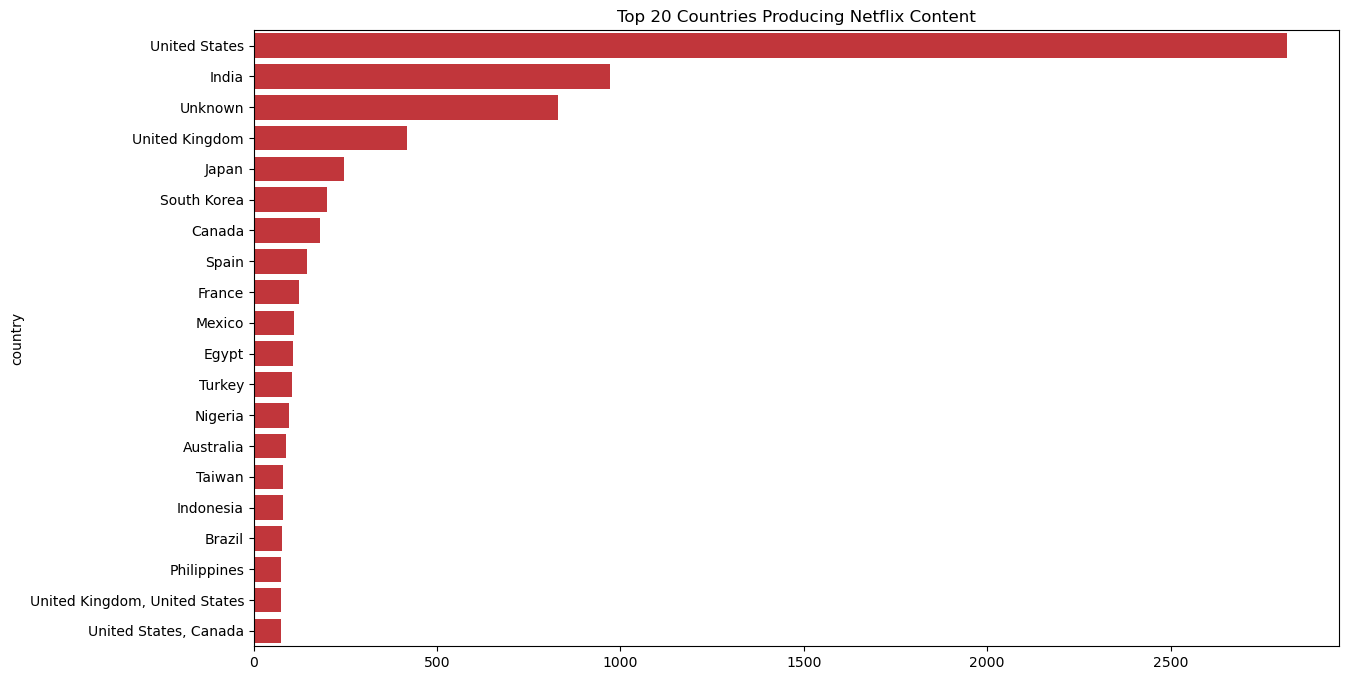

In [20]:
plt.figure(figsize=(14, 8))
df_country = df['country'].value_counts().head(20)
sns.barplot(x=df_country.values, y=df_country.index,color='#D81F26')
plt.title('Top 20 Countries Producing Netflix Content')
plt.show()

## Distribution of duration for both Movies and TV Shows

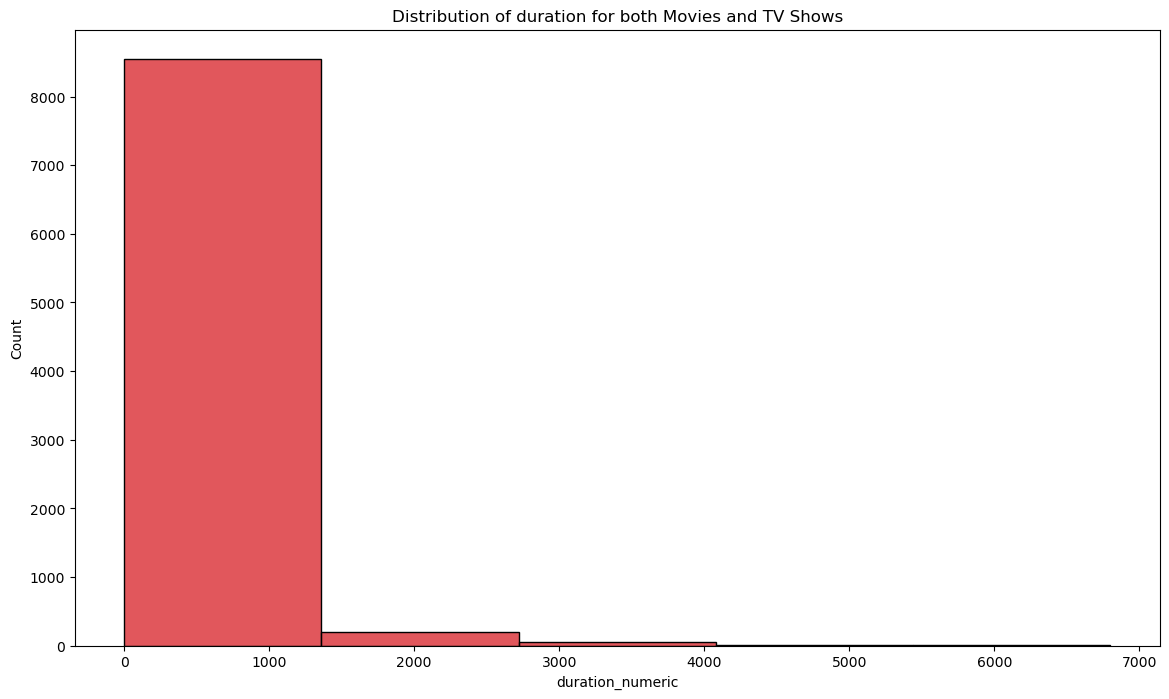

In [21]:
plt.figure(figsize=(14, 8))
sns.histplot(df['duration_numeric'], bins=5, color='#D81F26')
plt.title("Distribution of duration for both Movies and TV Shows")
plt.show()

## Rating Distribution

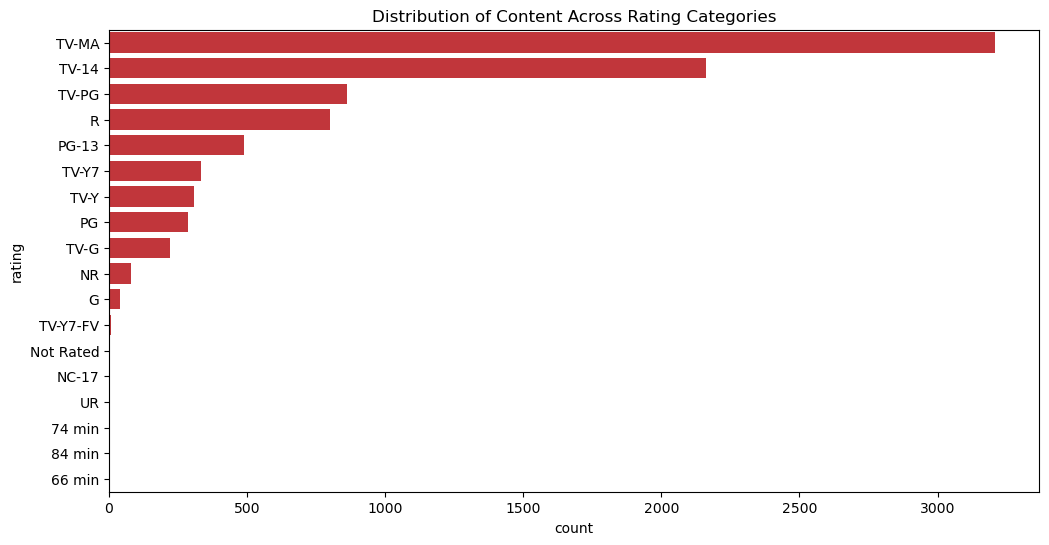

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, color='#D81F26')
plt.title('Distribution of Content Across Rating Categories')
plt.show()

## Number of Titles Released Per Year

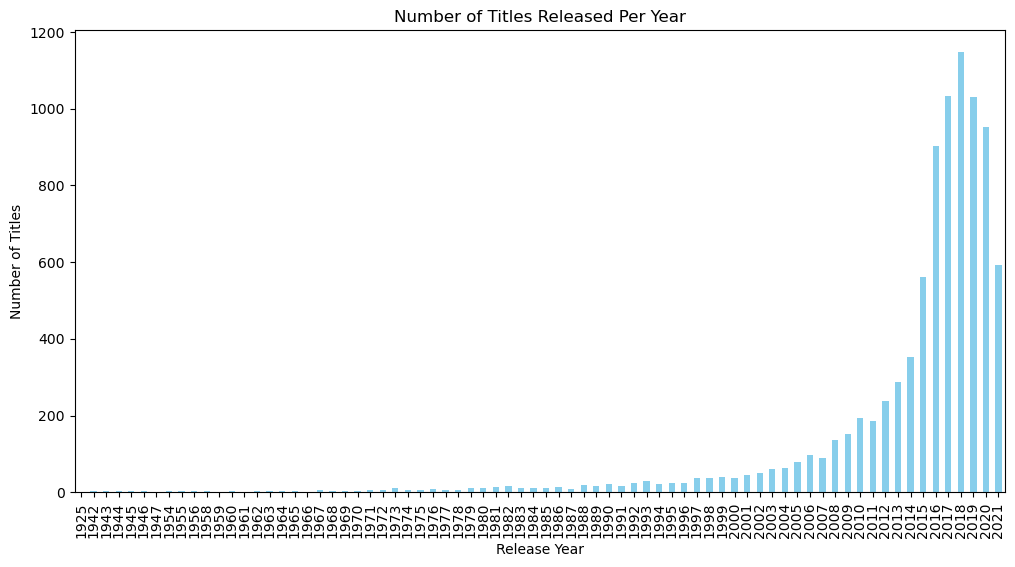

In [23]:
plt.figure(figsize=(12, 6))
df_release = df['release_year'].value_counts().sort_index()
df_release.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

## Content Added to Netflix by Month

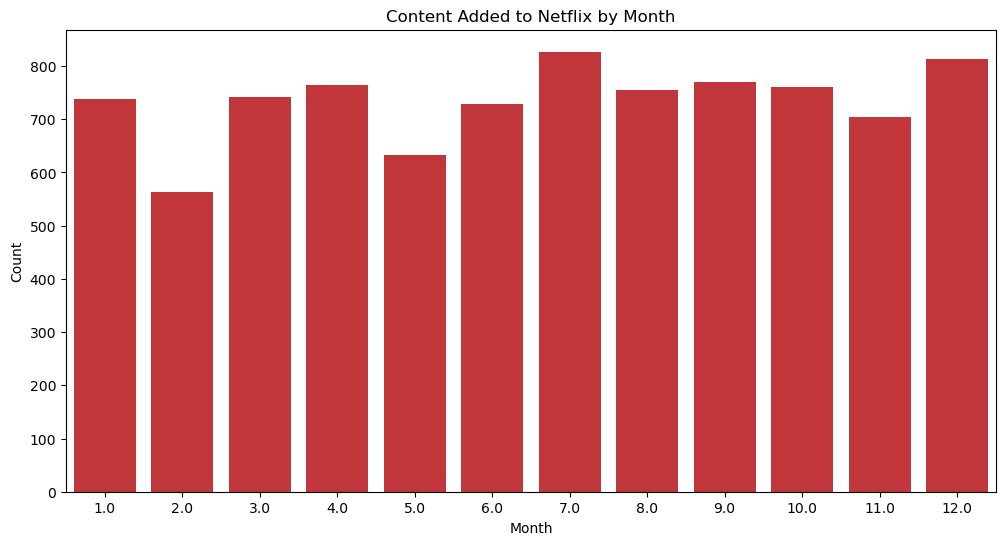

In [24]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', data=df,color='#D81F26')
plt.title('Content Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## Day of the Week Analysis

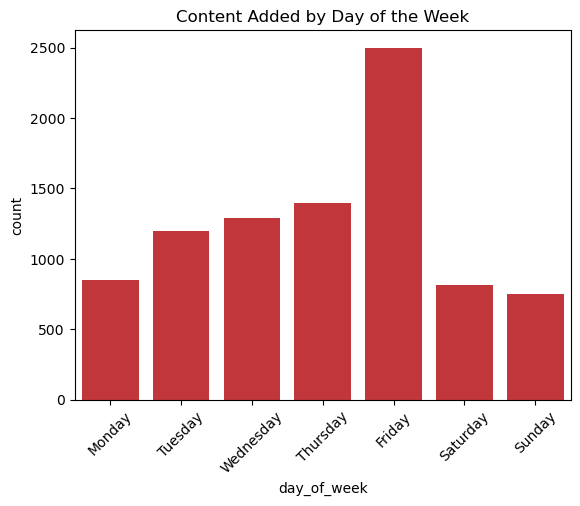

In [25]:
df['day_of_week'] = df['date_added'].dt.day_name()
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color='#D81F26')
plt.title('Content Added by Day of the Week')
plt.xticks(rotation=45)
plt.show()

## Most Frequent Directors

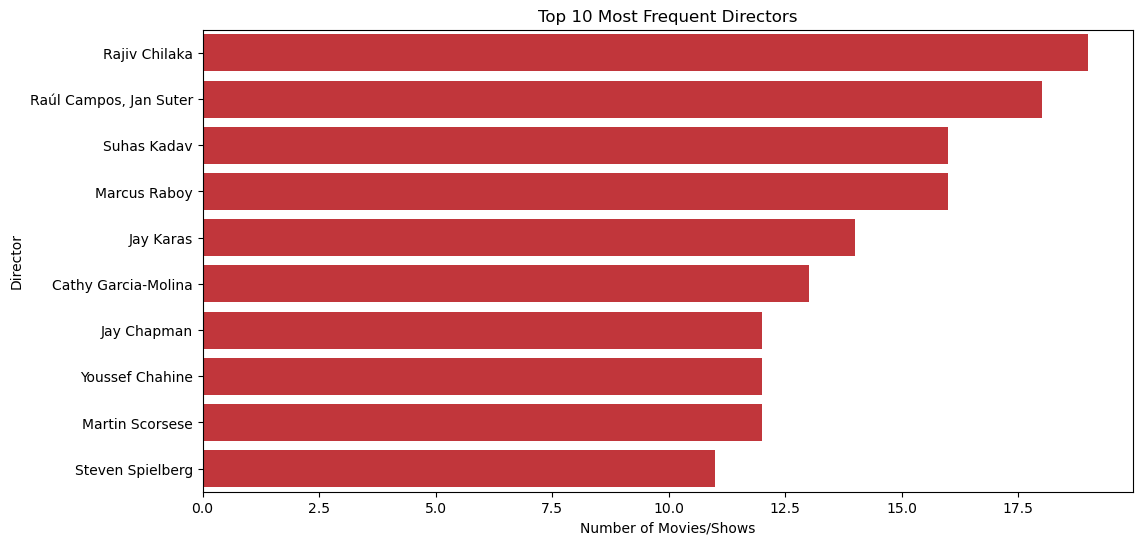

In [26]:
directors = df['director'].value_counts().iloc[1:11]
plt.figure(figsize=(12, 6))
sns.barplot(x=directors.values, y=directors.index,color='#D81F26')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Movies/Shows')
plt.ylabel('Director')
plt.show()

## Frequent Cast Members

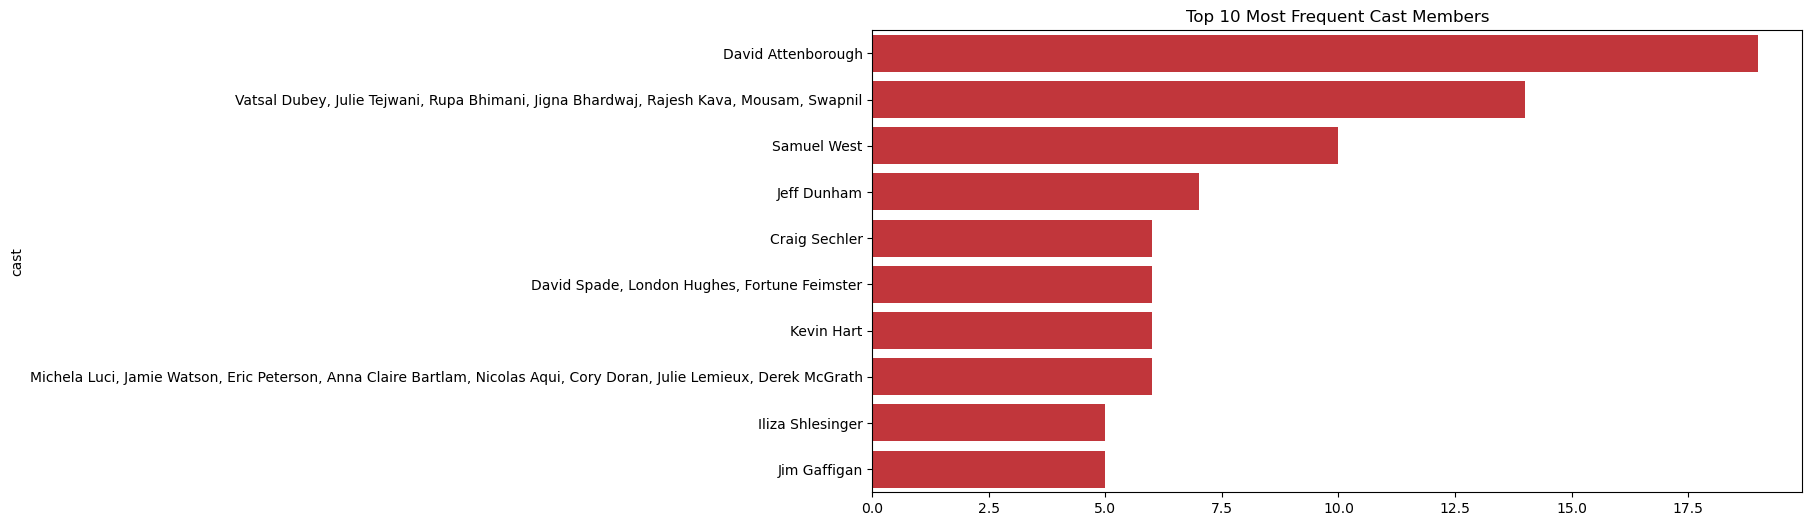

In [27]:
cast= df['cast'].value_counts().iloc[1:11]
plt.figure(figsize=(12, 6))
sns.barplot(x=cast.values, y=cast.index,color='#D81F26')
plt.title('Top 10 Most Frequent Cast Members')
plt.show()

## Popularity of Genres Over Time

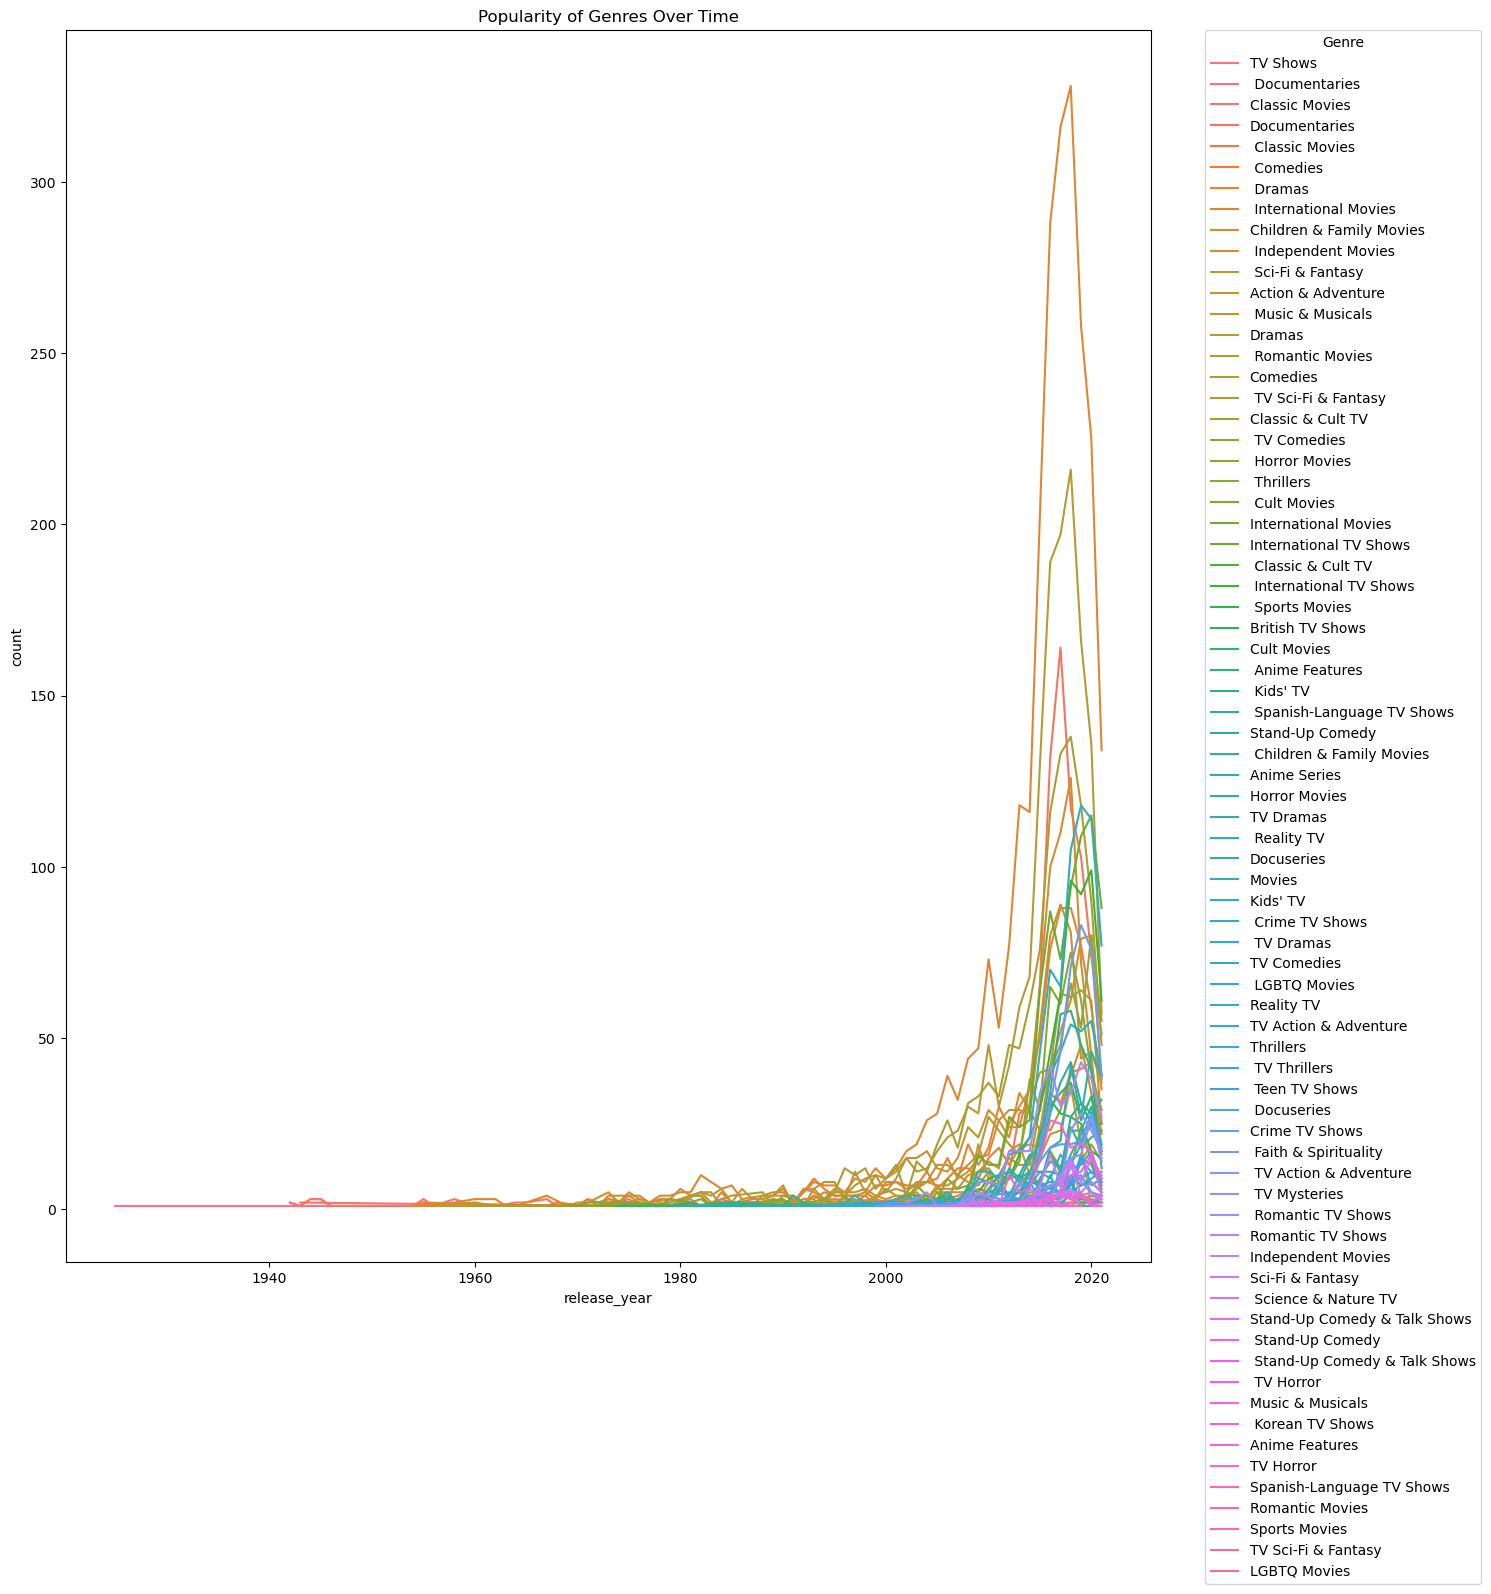

In [28]:
plt.figure(figsize=(14, 16))
genre_trend = df_exploded.groupby(['release_year', 'genre']).size().reset_index(name='count')
sns.lineplot(x='release_year', y='count', hue='genre', data=genre_trend)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Popularity of Genres Over Time')
plt.show()

## Relationship Between Content Duration and Rating

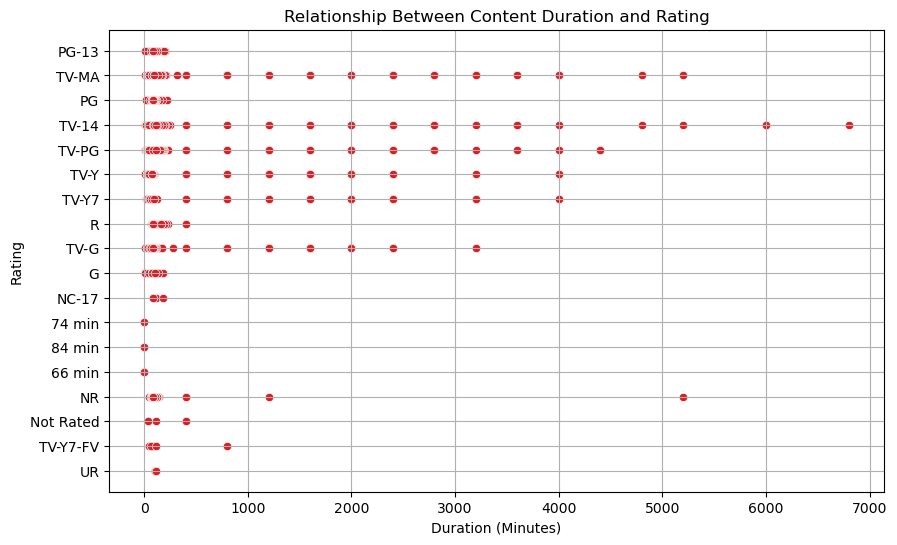

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_numeric', y='rating', data=df, color='#D81F26')
plt.title('Relationship Between Content Duration and Rating')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

## Plotting the relationship between countries and content ratings

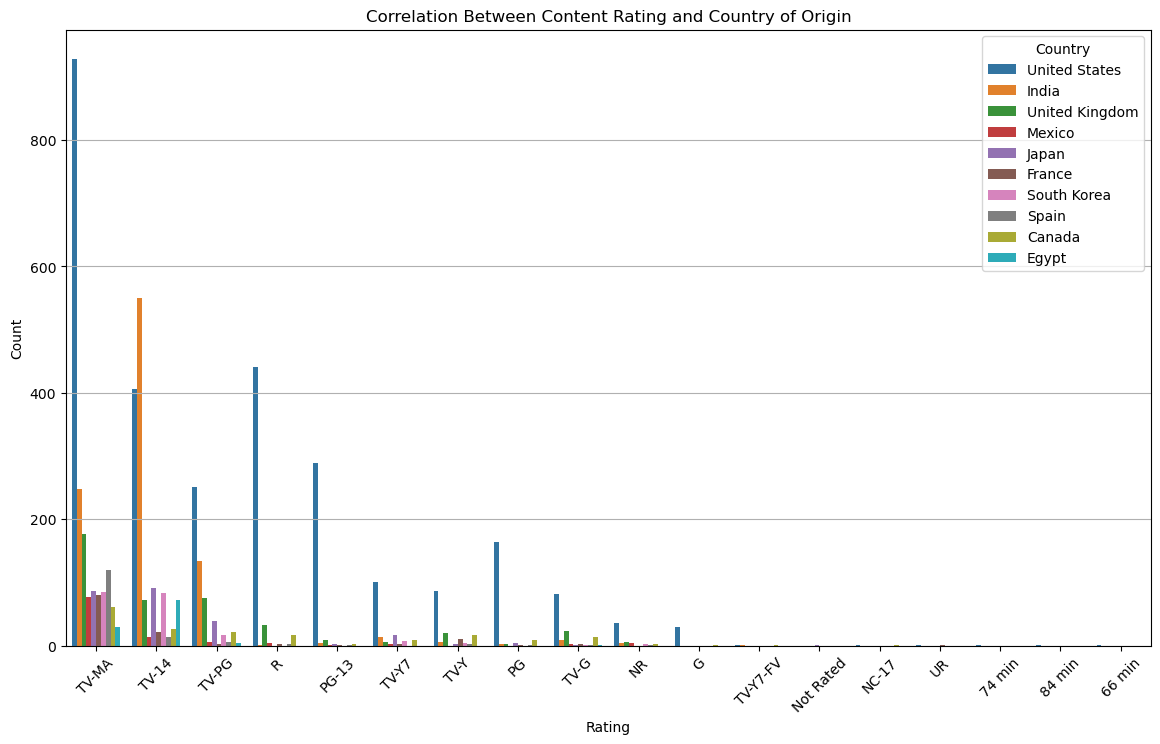

In [30]:
top_countries_rating = df[df['country'] != 'Unknown']['country'].value_counts().head(10).index
filtered_data = df[df['country'].isin(top_countries_rating)]
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data, x='rating', hue='country', order=df['rating'].value_counts().index)
plt.title('Correlation Between Content Rating and Country of Origin')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Extract top directors with count of gerne

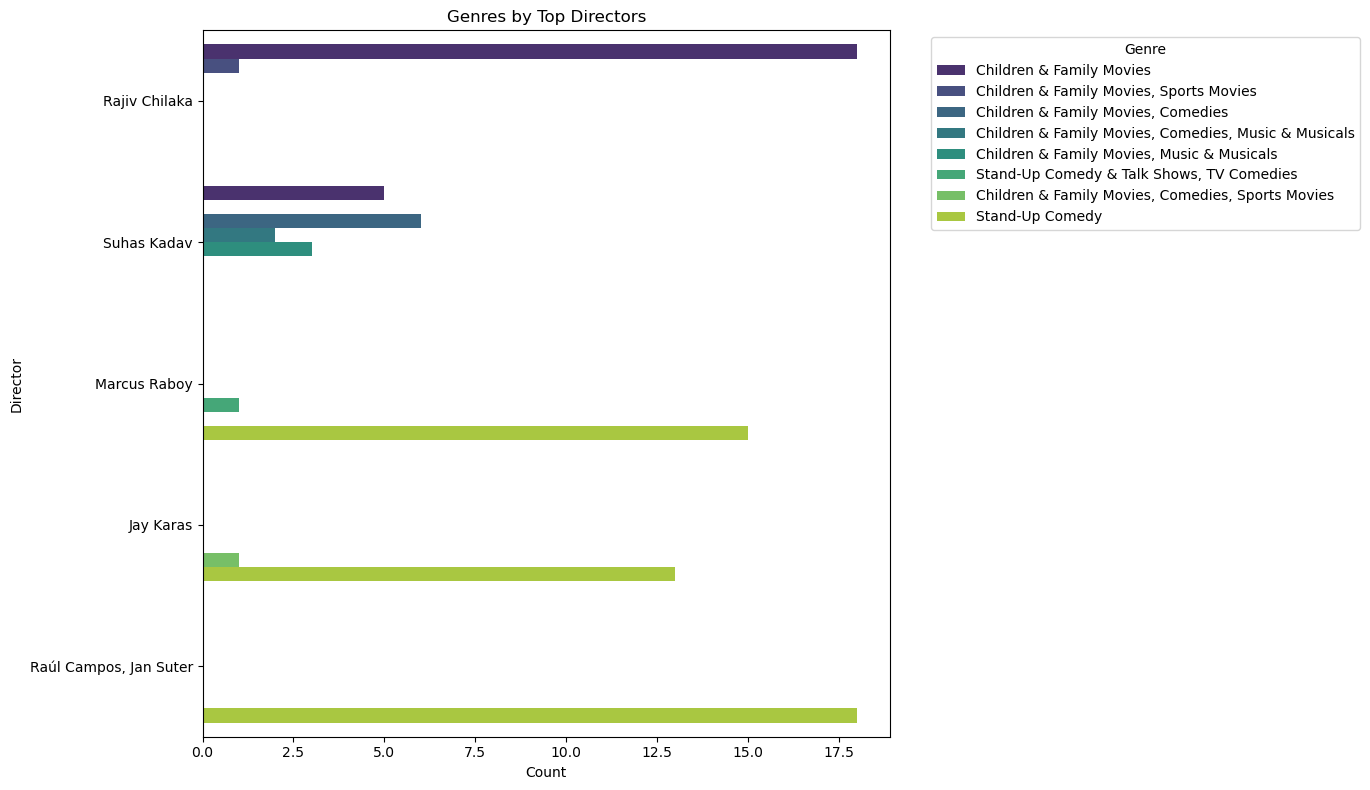

In [31]:
# Get the top 10 directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(5).index

# Filter data for those directors
director_data = df[df['director'].isin(top_directors)].explode('listed_in')

plt.figure(figsize=(14, 8))
sns.countplot(data=director_data, y='director', hue='listed_in', palette='viridis')
plt.title('Genres by Top Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Extract top cast members

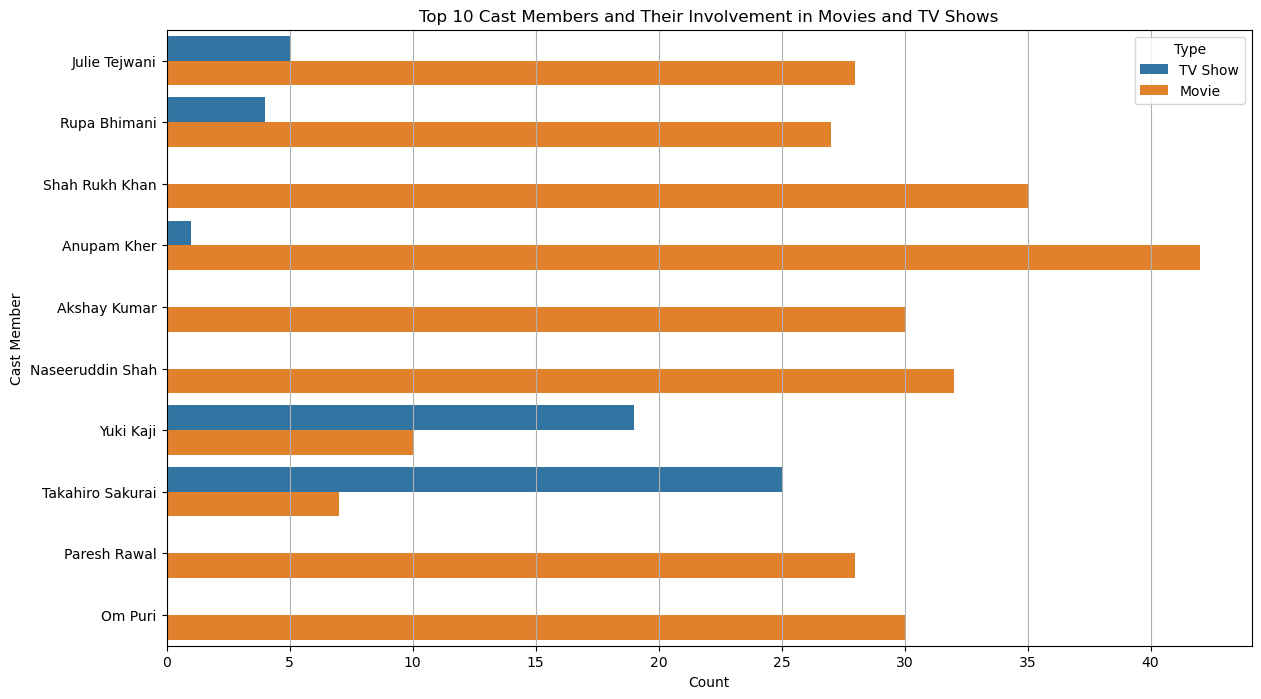

In [32]:
df_exploded_cast = df.copy()
df_exploded_cast['cast'] = df_exploded_cast['cast'].str.split(', ')
df_exploded_cast = df_exploded_cast.explode('cast')
top_cast = df_exploded_cast[df_exploded_cast['cast'] != 'Unknown']['cast'].value_counts().head(10).index
cast_data = df_exploded_cast[df_exploded_cast['cast'].isin(top_cast)]
plt.figure(figsize=(14, 8))
sns.countplot(data=cast_data, y='cast', hue='type')
plt.title('Top 10 Cast Members and Their Involvement in Movies and TV Shows')
plt.xlabel('Count')
plt.ylabel('Cast Member')
plt.legend(title='Type')
plt.grid(axis='x')
plt.show()

## Generate word cloud for recent titles

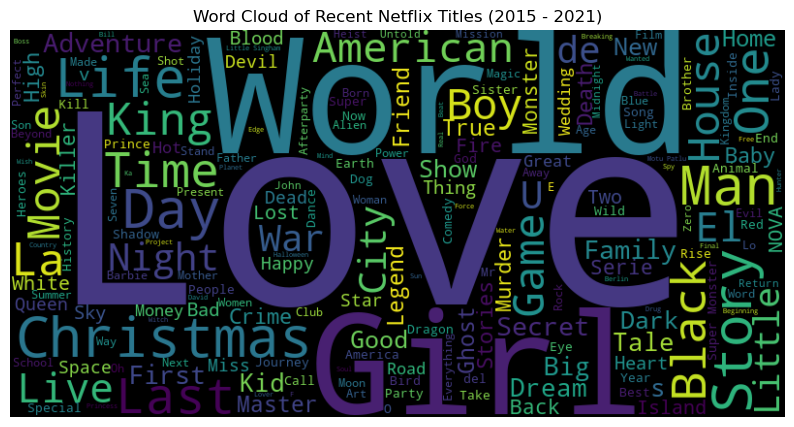

In [33]:
from wordcloud import WordCloud
recent_titles = ' '.join(df[df['release_year'] >= 2015]['title'].dropna())
wordcloud_recent = WordCloud(width=800, height=400, background_color='black').generate(recent_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_recent, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Recent Netflix Titles (2015 - 2021)')
plt.show()

## Netflix Originals vs Licensed Content

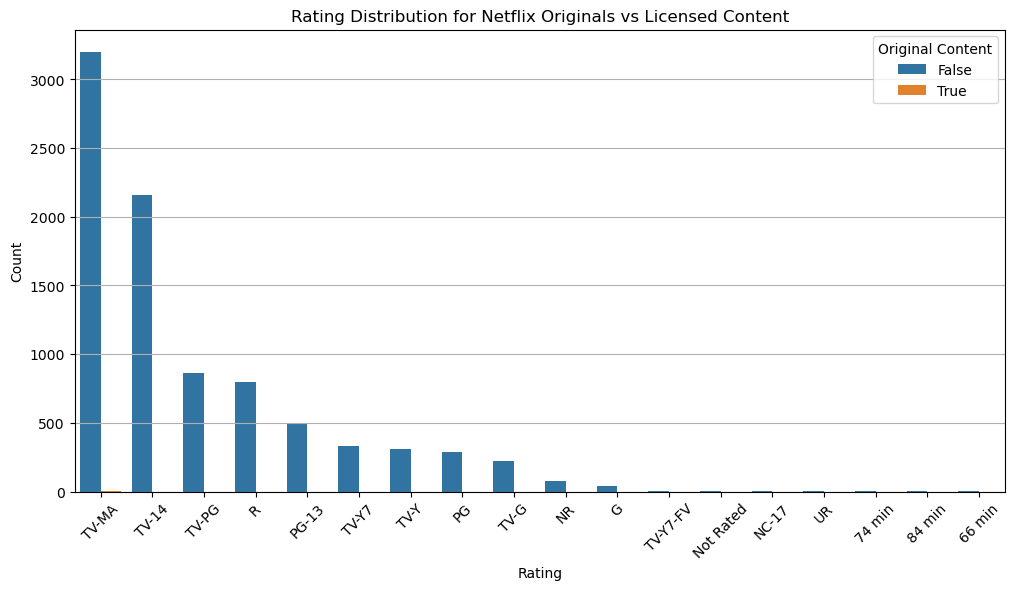

In [34]:
df['is_original'] = df['title'].str.contains('Netflix')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='is_original', order=df['rating'].value_counts().index)
plt.title('Rating Distribution for Netflix Originals vs Licensed Content')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Original Content')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Diversity of Content Over Time

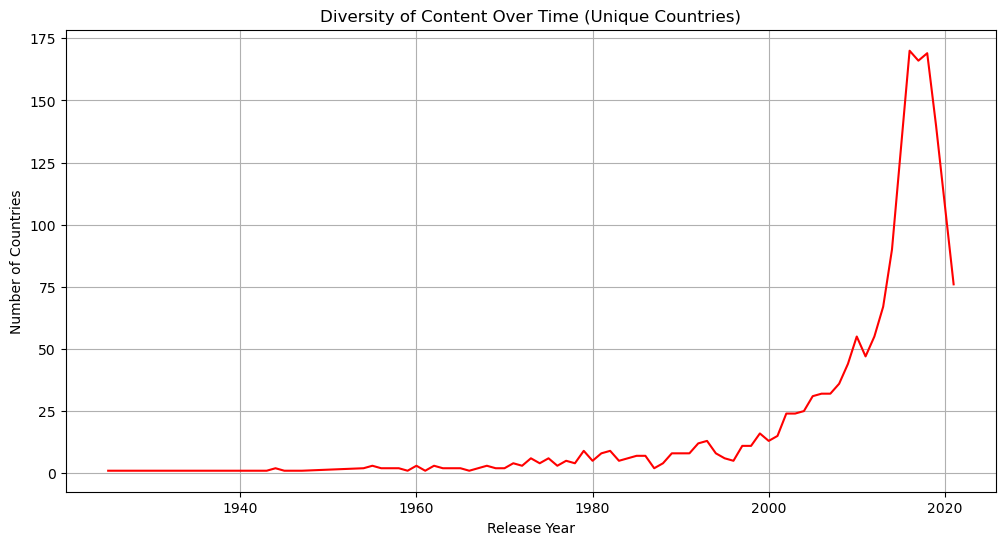

In [35]:
country_year = df.groupby('release_year')['country'].nunique()
plt.figure(figsize=(12, 6))
country_year.plot(kind='line', color='red')
plt.title('Diversity of Content Over Time (Unique Countries)')
plt.xlabel('Release Year')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

## Correlation Between Age of Content and Popularity

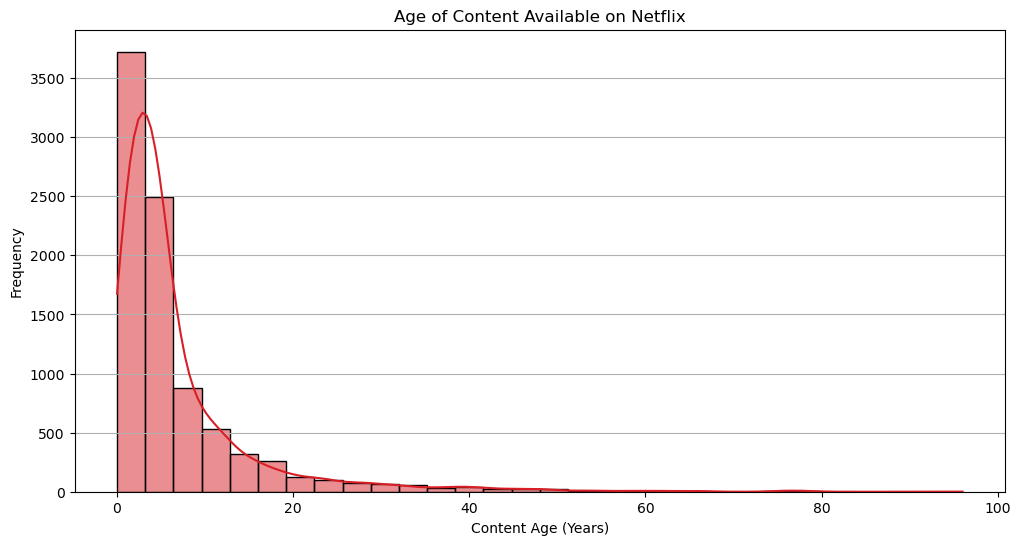

In [36]:
df['content_age'] = 2021 - df['release_year']

plt.figure(figsize=(12, 6))
sns.histplot(df['content_age'], bins=30, kde=True, color='#D81F26')
plt.title('Age of Content Available on Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()